# US Domestic Flights On-Time performace
##                               for H1-2019
## by Suresh Babu K

## Investigation Overview

> * The US Department of Transport Bureau of Statistics publishes Flight on-time monthly data 
> * Has Details of  timeliness of flights, Airlines, their origin and destimation, reasons for delay etc.
> * Dataset can be found at https://www.transtats.bts.gov/Fields.asp 
> * The data is available at https://www.transtats.bts.gov/DL_SelectFields.asp for public to download.

#### The Goal of the Investiation.  
> * The primary goal of investiagtion is to find reasons of delays using main data points.   
> * Visualise the reasons for Arrival delay and Departure delays seperately.  


## Dataset Overview

> The dataset is has sections of data with number of datapoint  **1.Time Period** 
      >    * Year
      >    * Quarter
      >    * Month
      >    * Day of the Month
      >    * Day of the Week
      >    * Flight Date


## Dataset Overview continued ..
> Other data points of interest **2. Airline**.
> * Details of Airlines company and Flight 
> * **Origin** - Details of originating City and Airport 
> * **Destination** - Details of Destination City and Airport 
> * **Departure Performance**
>> * Departure time 
>> * Planned departure time
> * **Arrival Performance**
>> * Arrival time delay 
>> * Planned Arrival time 

### Dataset Overview Continued - Data sections

> * Cancellation and Diversions 
> * Indicators of cancelled and Diverted flights
> * Flight Details
> * Planned departure time
> * Planned Arrival time
> * Distance
> * Taxi In time
> * Taxi Out time
> * Cause of delay Categories
> * Gate return to origin Airport details
> * Diverted flight details 

## Dataset continued..

> Further to the data fields are categorical variable, some of them are ordered. 
> * Delay Time block - The hour duration of the day like 1900-1959 
> * Delay Time Group - Blocks of every 15 min , 0-15 is 0 and 0-30 is 1 and so on, to indicate the severity of the delay. 
> * Distant Group - The blocks of 250 kms is indicated as distant group. First 250 kms is 1 and upto 500 kms is 2 and so on. 
> * Delay in minutes due to each Categories of delay is shown separately to show all causes of delay, like NAS, SECURITY, LATE AIRCRAFT, CARRIER DELAY, WEATHER DELAY etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_jan = pd.read_csv('T_ONTIME_REPORTING_Jan_2019.csv',
                     engine='c')
df_feb = pd.read_csv('T_ONTIME_REPORTING_Feb_2019.csv',
                     engine='c')
df_mar = pd.read_csv('T_ONTIME_REPORTING_Mar_2019.csv',
                     engine='c')
df_apr = pd.read_csv('T_ONTIME_REPORTING_Apr_2019.csv',
                     engine='c')
df_may = pd.read_csv('T_ONTIME_REPORTING_May_2019.csv',
                     engine='c')
df_jun = pd.read_csv('T_ONTIME_REPORTING_Jun_2019.csv',
                     engine='c')

In [4]:
# Concatinate all frames to 1 dataframe
frames = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun]
df_H12019 = pd.concat(frames, sort=True)

In [5]:
del df_jan
del df_feb
del df_mar
del df_apr
del df_may
del df_jun

In [6]:
# Omit diverted and cancelled flights
df_ndely = df_H12019.query('CANCELLED != 1 & DIVERTED != 1')
df_ndely.sample(5)

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_GROUP,ARR_DELAY_NEW,ARR_TIME,ARR_TIME_BLK,CANCELLATION_CODE,CANCELLED,...,QUARTER,SECURITY_DELAY,TAIL_NUM,TAXI_IN,TAXI_OUT,TOTAL_ADD_GTIME,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON,YEAR
433119,144.0,129.0,0.0,-18.0,-2.0,0.0,1520.0,1500-1559,NaN,0,...,1,NaN,260NV,5.0,10.0,NaN,NaN,1406.0,1515.0,2019
196451,172.0,147.0,0.0,-7.0,-1.0,0.0,1033.0,1000-1059,NaN,0,...,1,NaN,N948JB,5.0,20.0,NaN,NaN,801.0,1028.0,2019
244120,133.0,112.0,0.0,-12.0,-1.0,0.0,905.0,0900-0959,NaN,0,...,2,NaN,N221FR,4.0,17.0,NaN,NaN,809.0,901.0,2019
15981,195.0,170.0,0.0,10.0,0.0,10.0,2400.0,2300-2359,NaN,0,...,1,NaN,N989AN,8.0,17.0,NaN,NaN,2302.0,2352.0,2019
197549,145.0,117.0,0.0,13.0,0.0,13.0,2121.0,2100-2159,NaN,0,...,1,NaN,324NV,6.0,22.0,NaN,NaN,1718.0,2115.0,2019


## Flight Delay Minutes

> * The data shows Departure are interestingly upto 15 minutes earlier (-15 shows 15 minutes earlier), but delays of 10 minutes are also quite significant in number.

> * The data also shows Arrival are interestingly upto 15 minutes earlier (-15 shows 15 minutes earlier), but 75 minutes or more delay are also seen in good number.

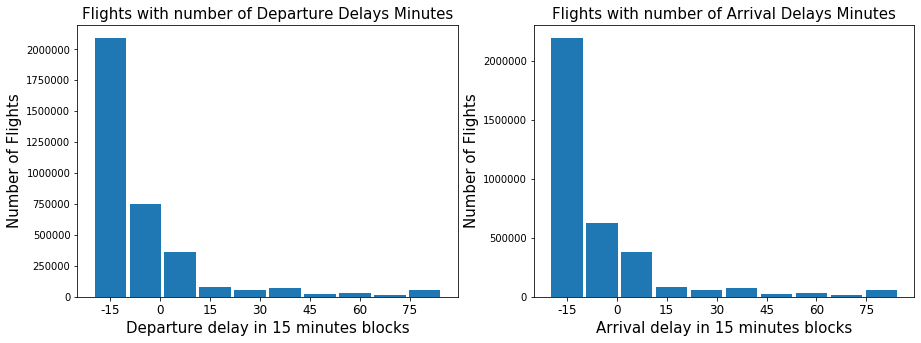

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=[15,5])

var = ['DEP_DELAY_GROUP', 'ARR_DELAY_GROUP']
var1 = ['Departure','Arrival']

for i in range(len(var)):
    ax[i].hist(data=df_ndely, x=var[i], align='left', rwidth=0.90)
    ax[i].set_xlabel('{} delay in 15 minutes blocks'.format(var1[i]),fontsize=15)
    ax[i].set_xticklabels(np.arange(-30,210,15),fontsize=12)  
    ax[i].set_ylabel('Number of Flights',fontsize=15)
    ax[i].set_title('Flights with number of {} Delays Minutes'.format(var1[i]),fontsize=15)

plt.show()

## Delays by Day of the Week

> Interestingly greater than 15 minitues delays are most observed on Wednesday and Thurdays followed by saturdays and sundays. Fridays have least delays. This seems to be bit counter intutive as there are usually more flights on Friday.

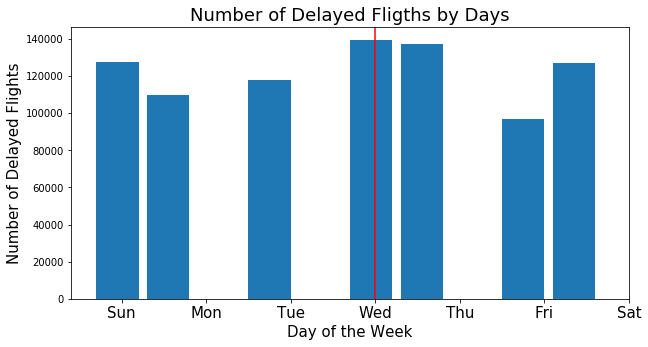

In [29]:
df_dely = df_H12019.query('DEP_DEL15 > 0 | ARR_DEL15 > 0')

fig, ax = plt.subplots(nrows=1, figsize=[10,5])

var = 'DAY_OF_WEEK'

ax.hist(data=df_dely, x=var, 
        width = 0.5,
        align='left'
       )            
ax.set_xlabel('Day of the Week'.format(var), fontsize=15)
ax.set_ylabel('Number of Delayed Flights', fontsize=15)
ax.set_title('Number of Delayed Fligths by Days', fontsize=18)
ax.set_xticklabels(['x', 'Sun','Mon','Tue','Wed','Thu','Fri','Sat'], fontsize=15)
ax.axvline(df_dely[var].value_counts().index[0],c='r')
plt.show()

In [12]:
# Presence of Departure delay and Arrvaial delay
# del [df_Ddely,df_Adely] 
df_Ddely = df_H12019.query('DEP_DELAY_NEW > 0')
df_Adely = df_H12019.query('ARR_DELAY_NEW > 0')

## Delays by Time of the Day

> The bulk of Arrival Departure delay is during evening peak Hour at 1700 hrs. Departure delay gradually increase from 0000 hrs and drastically decrease by 2359 hours

> Peak arrival delay is seen late in the day at 2100 hours, but also high until midnight. 

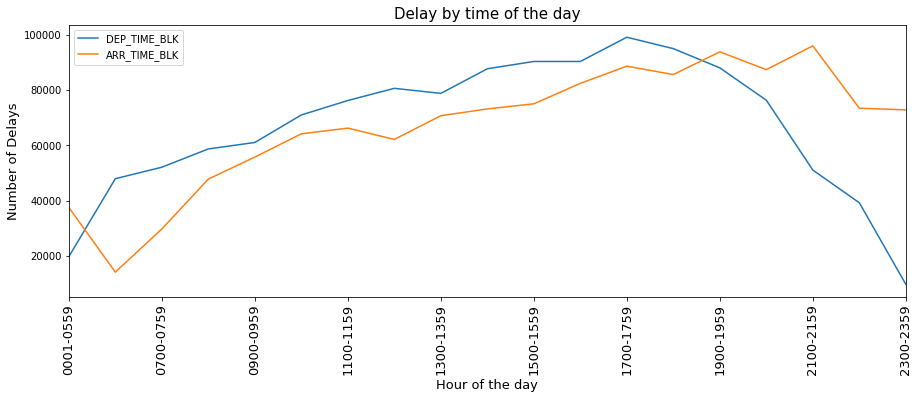

In [15]:
x = df_Ddely.groupby(by='DEP_TIME_BLK')['DEP_TIME_BLK'].count()
y = df_Adely.groupby(by='ARR_TIME_BLK')['ARR_TIME_BLK'].count()

plt.figure(figsize=(15,5))

x.plot();
y.plot();
plt.legend();
plt.title('Delay by time of the day', fontsize=15);
plt.ylabel('Number of Delays', fontsize=13);
plt.xlabel('Hour of the day',fontsize=13);
plt.xticks(rotation=90,fontsize=13);

In [19]:
# del df_ddely
# del df_adely
# del [a,b]
df_ddely = df_H12019.query('DEP_DEL15 > 0 and ARR_DEL15 > 0 ')
a = df_ddely[['LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY','SECURITY_DELAY']].mean()
# 
# 
df_adely = df_H12019.query('DEP_DEL15 == 0 and ARR_DEL15 > 0 ')
b = df_adely[['LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY','SECURITY_DELAY']].mean()

## Reason of the Delays

>  Major reason for **Departure delay** is **Late Aircraft arrival** and **Carrier delays**. This is mainly due to Airline company maintaince of Aircrafts like Fueling. mechanical and other Engineering work, Loading Supplier, Cleaning etc..

>  Only outstanding reason for **Arrvial Delay** is **NAS - National Aviation System** related delays.  This indicates the air traffic approching the airport is congested or Airport has congested runways. This cause is directly related to destination airports. 

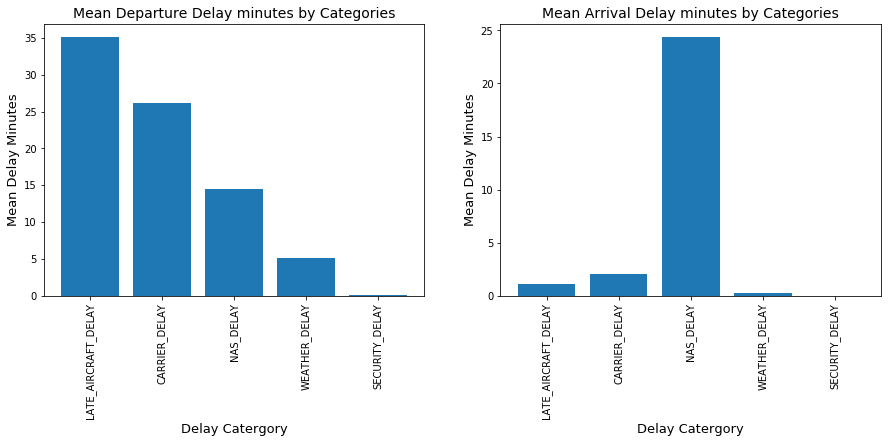

In [21]:
fig, axs = plt.subplots(figsize=[15,5], nrows=1, ncols=2)

var = [a,b]
var_1 = ['Departure', 'Arrival']
for i in range(0,len(var)):
    axs[i].bar(var[i].index, height=var[i].values)
    axs[i].set_xlabel('Delay Catergory', fontsize=13)
    axs[i].set_ylabel('Mean Delay Minutes', fontsize=13)
    axs[i].set_xticklabels(var[i].index, rotation='vertical')
    axs[i].set_title('Mean {} Delay minutes by Categories'.format(var_1[i]), fontsize=14)
# plt.legend()

In [22]:
df_ld = df_H12019[df_H12019['LATE_AIRCRAFT_DELAY'] > 0.0 ]
ld = df_ld.groupby(by='OP_UNIQUE_CARRIER')['LATE_AIRCRAFT_DELAY'].mean().sort_values(ascending=False)

## Departure Delay due to Late Aircraft Arrival 
> The **Late Aircraft arrival** is found to be **major cause of Departure delays**. As the aircraft arrives at airport is delayed starting of the subsequent trip is delayed.
> * Airline wise mean delay due to **Late Aircraft arrival, 'YV' - MESA Airline** is found to be **consistent worst performer** on all days of the week. The airlines has a **mean Late Arrival Delay minutes between 70 to 90 minutes**.
> * **HA - Hawaian Airline** is the **consistent best performer** with **mean Late arrival delay of 20 to 40 Minutes**.

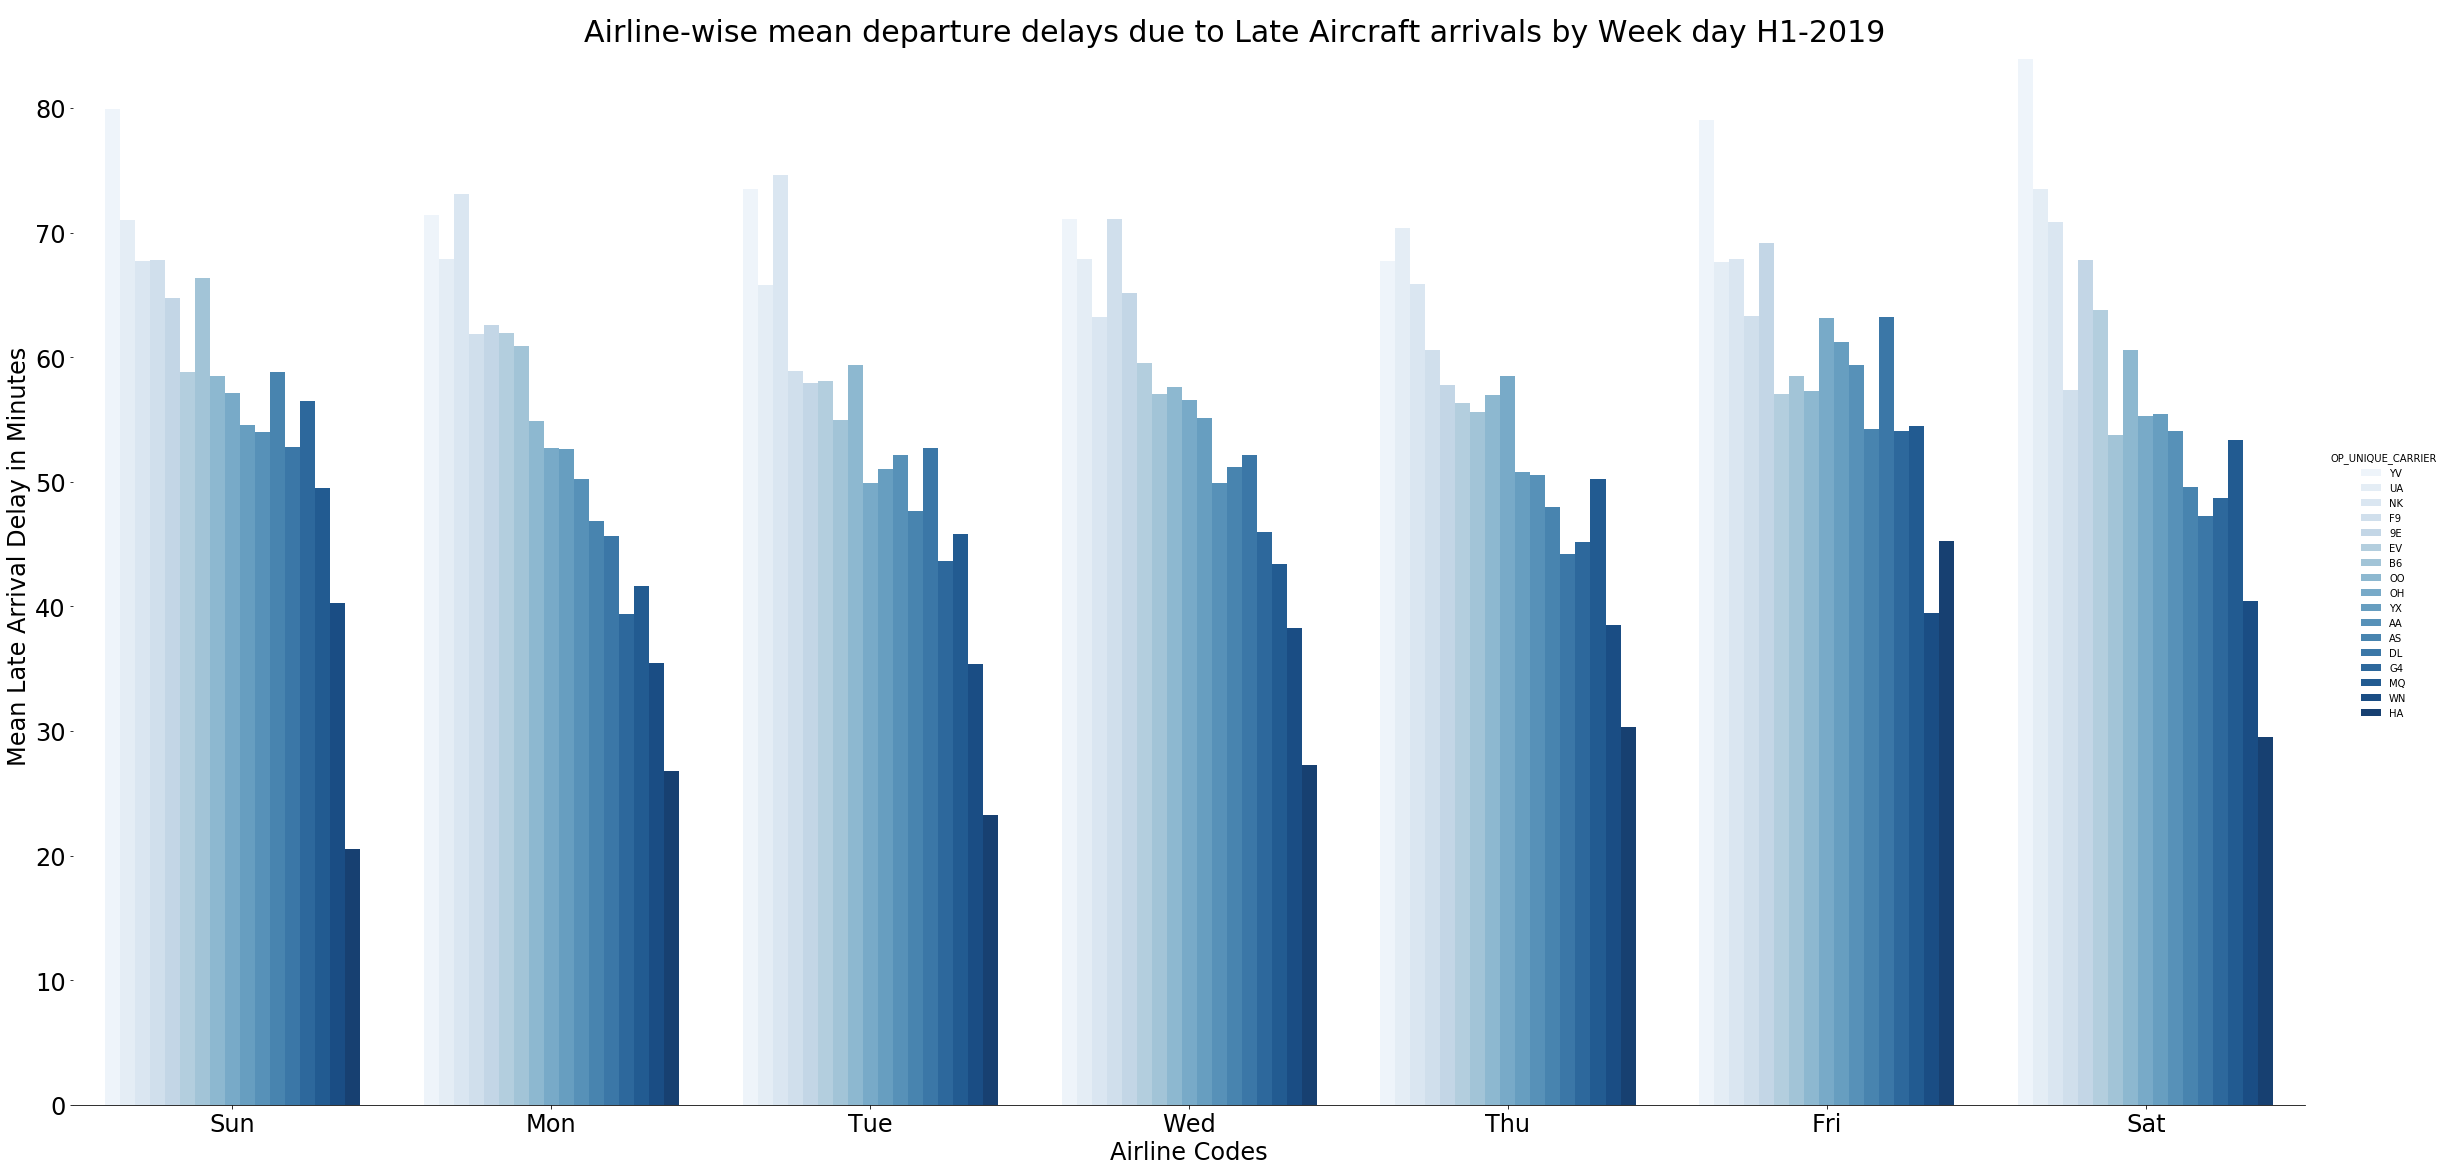

In [31]:
sb.axes_style("whitegrid");

sb.catplot(data = df_ld,
           x='DAY_OF_WEEK',
           y='LATE_AIRCRAFT_DELAY', 
           hue='OP_UNIQUE_CARRIER',
           hue_order=ld.index,
           kind='bar',
           height=16,
           aspect=2,
           estimator=np.mean,
           ci=None,
           palette=sb.color_palette("Blues", ld.shape[0])
          )

sb.despine(left=True);

plt.suptitle('Airline-wise mean departure delays due to Late Aircraft arrivals by Week day H1-2019',
            fontsize=30);
plt.xlabel('Airline Codes', fontsize=24);
plt.ylabel('Mean Late Arrival Delay in Minutes', fontsize=24);
plt.yticks(fontsize=24);
xlt = plt.gca().get_xticks();
plt.xticks(xlt,['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],fontsize=24)
plt.show();

In [23]:
df_cd = df_H12019[df_H12019['CARRIER_DELAY'] > 0.0 ]
cd = df_cd.groupby(by='OP_UNIQUE_CARRIER')['CARRIER_DELAY'].mean().sort_values(ascending=False)

## Departure Delay due to Carrier Company 
> The **delays caused by Carrier company** to prepare the aircraft for next trip after arriving at airport is categorised as **Carrier Delay**. Preparing the aircraft for next trip like cleaning, loading the supplies and luggages and passangers are all causes of the delay.

> * Airline wise mean delay due to **Carrier Compnay, 'OO' - SkyWest Airline** is found to be **consistent worst performer** on all days of the week. The airline's **mean delay minutes are between 90 to 100 minutes**.
> * **OO Airlines** is obsevered to have sharp difference between next airlines in line **EV - EVa Airlines**.

> * **WN - Southwest Airlines & HA - Hawaian Airline** is the **consistent best performer** with **mean Carrier delays at 35 to 40 Minutes**.

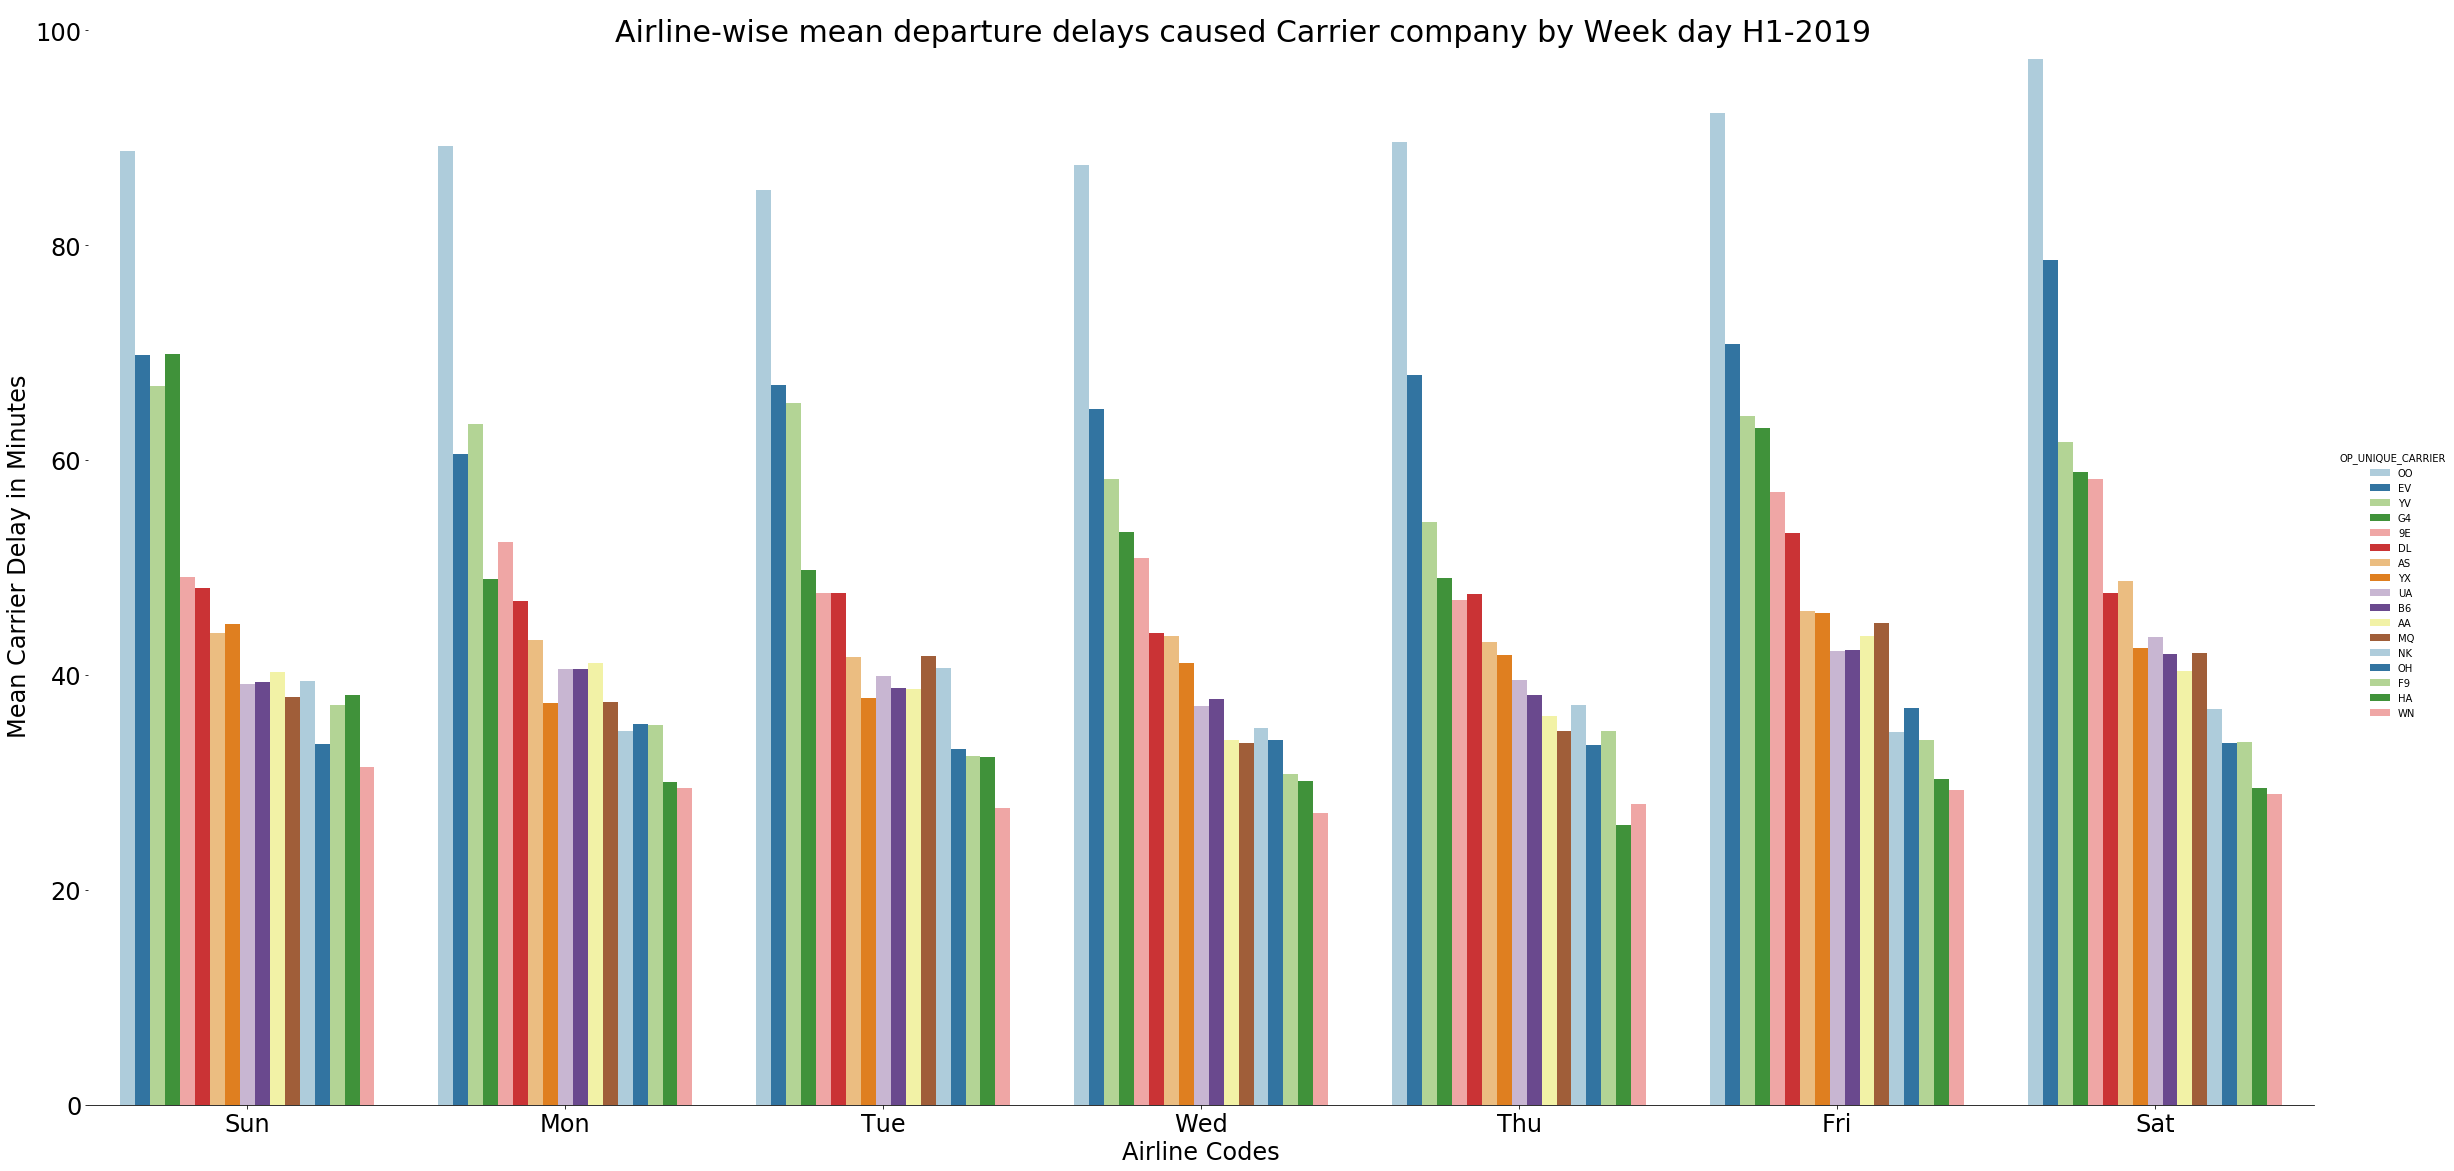

In [32]:
sb.axes_style("whitegrid");
c = sb.color_palette('Paired',cd.shape[0]);

sb.catplot(data = df_cd,
           x='DAY_OF_WEEK',
           y='CARRIER_DELAY', 
           hue='OP_UNIQUE_CARRIER',
           hue_order=cd.index,
           kind='bar',
           height=16,
           aspect=2,
           estimator=np.mean,
           ci=None,
           palette=c,
          )

sb.despine(left=True);

plt.suptitle('Airline-wise mean departure delays caused Carrier company by Week day H1-2019',
            fontsize=30);
plt.xlabel('Airline Codes', fontsize=24);
plt.ylabel('Mean Carrier Delay in Minutes', fontsize=24);
plt.yticks(fontsize=24);
xlt = plt.gca().get_xticks();
plt.xticks(xlt,['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],fontsize=24)
plt.show();

In [34]:
df_ad = df_H12019[df_H12019['NAS_DELAY'] > 0.0 ]
ad = df_ld.groupby(by='DEST')['NAS_DELAY'].mean().sort_values(ascending=False)

df_ad = df_ad[df_ad['DEST'].isin(ad[ad >= 10].index)]

In [35]:
amd = df_ad[df_ad['DEST'].isin(ad[ad >= 10].index)].groupby(by='DEST')['NAS_DELAY'].sum().sort_values(ascending=False)
amd.size

23

## Arrival Delay by Airports

> Major reason for Arrival delay is NAS delay cause due to Air traffic congestion at airports.

> * Top 10 airports with Heavy NAS Delays by day of the week and hour of the day is shown
> * **ORD airport at Chicago** is on top of the list, followed by **EWR Airport at Newark** 
> * **ASE Aspen County airport** shows spikes on **Monday & Friday**s at later part of the day but otherwise a quite airport.

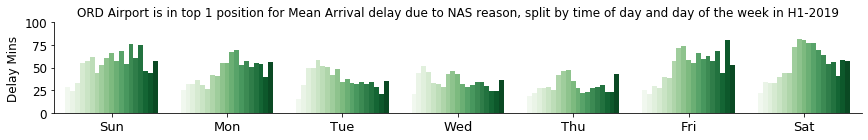

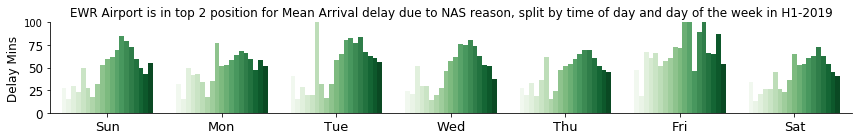

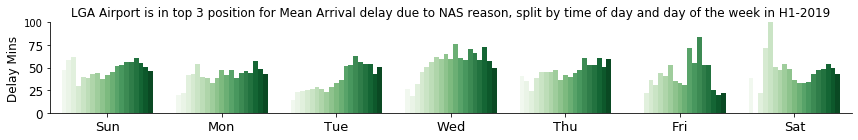

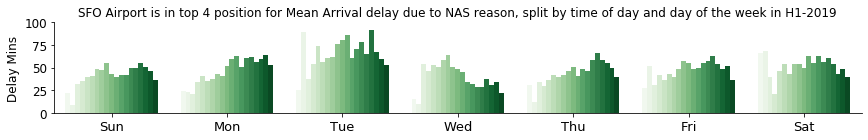

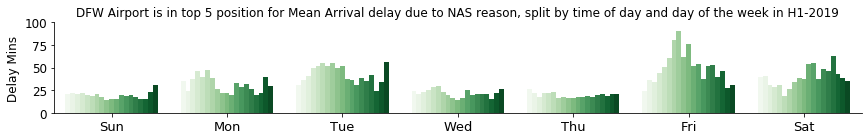

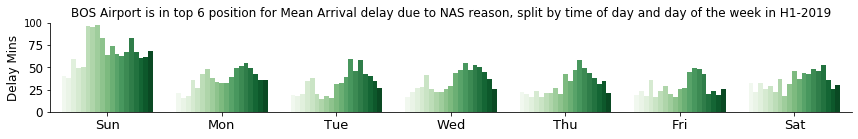

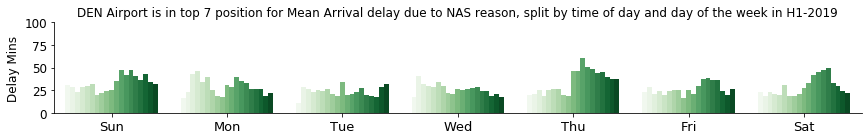

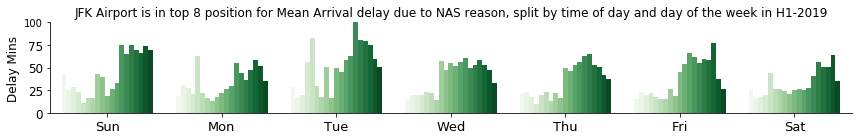

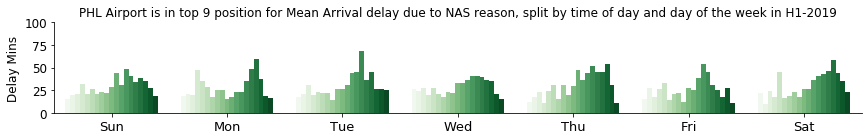

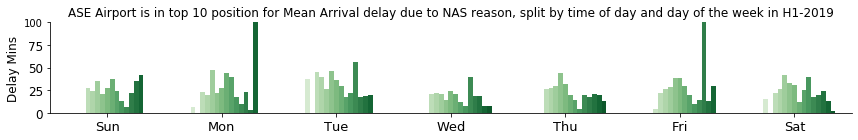

In [36]:
for i,dest in enumerate(amd.index.tolist()[:10]):   
    sb.catplot(data = df_ad[df_ad['DEST']== dest],
           x='DAY_OF_WEEK',
           y='NAS_DELAY', 
           hue='ARR_TIME_BLK',
           hue_order=np.sort(df_ad['ARR_TIME_BLK'].unique()),
           kind='bar',
           height=2,
           aspect=6,
           estimator=np.mean,
           ci=None,
           palette='Greens',
           legend=False,
           sharex=True
          );
    plt.xticks(plt.gca().get_xticks(),['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],fontsize=13);
    plt.yticks(fontsize=12);
    plt.xlabel('');
    plt.title('{} Airport is in top {} position for Mean Arrival delay due to NAS reason, split by time of day and day of the week in H1-2019'.format(dest,i+1,),
              fontsize=12);
    plt.ylabel('Delay Mins',  fontsize=12);
    plt.ylim(0,100);
    plt.show();